Importing Dependencies

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Data Collection and Processing

In [66]:
#loading csv data to pandas dataframe
df=pd.read_csv('/content/heart.csv')
heart_df=df.copy()

In [67]:
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [68]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       276 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   280 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [69]:
#printing last 5 rows of dataset
heart_df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0,0,140,241,0,1,NaN,1,0.2,1,0,3,0
299,45.0,1,3,110,264,0,1,132.0,0,1.2,1,0,3,0
300,68.0,1,0,144,193,1,1,141.0,0,3.4,1,2,3,0
301,57.0,1,0,130,131,0,1,115.0,1,1.2,1,1,3,0
302,57.0,0,1,130,236,0,0,174.0,0,0.0,1,1,2,0


In [70]:
#number of rows and columns in dataset
heart_df.shape

(303, 14)

In [71]:
heart_df.isnull().sum()

age         27
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     23
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

<Axes: >

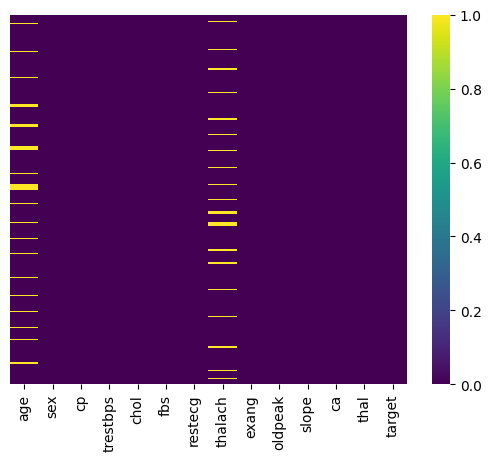

In [72]:
#heatmap
import seaborn as sns
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

<ipython-input-73-423799895cf4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.age)


<Axes: xlabel='age', ylabel='Density'>

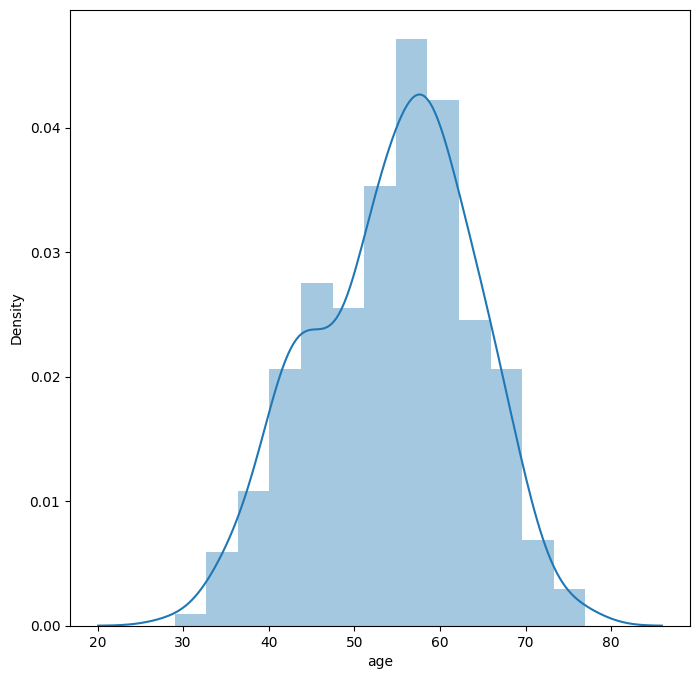

In [73]:
#distribution of data in age
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(heart_df.age)

<ipython-input-74-f84436d2239f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.thalach)


<Axes: xlabel='thalach', ylabel='Density'>

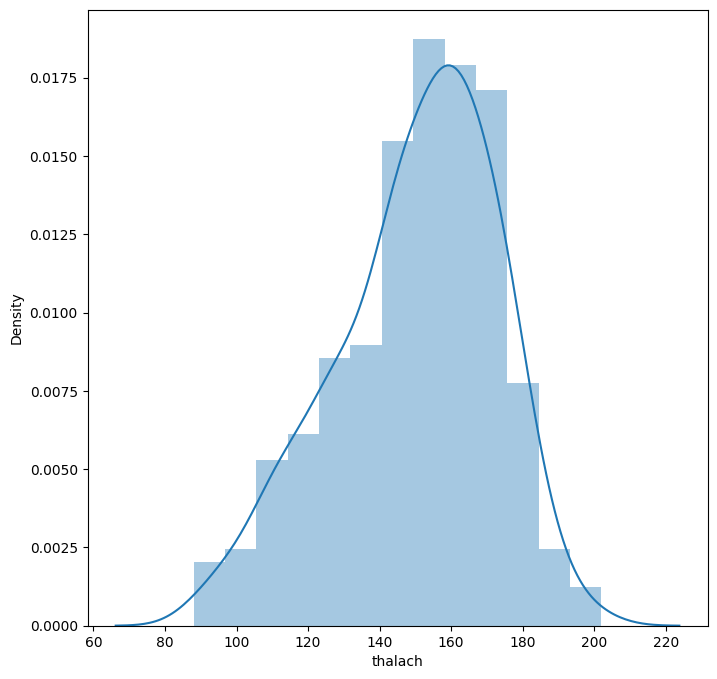

In [74]:
#distribution of data in thalach
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(heart_df.thalach)

In [75]:
#replace the missing values with median values
heart_df['age'].fillna(heart_df['age'].median(),inplace=True)
heart_df['thalach'].fillna(heart_df['thalach'].median(),inplace=True)

In [76]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

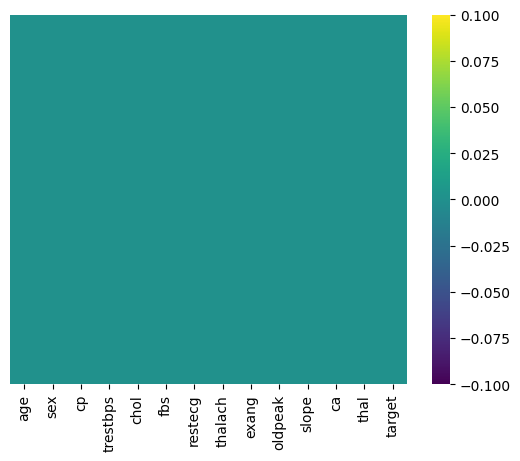

In [77]:
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

<ipython-input-78-051f31b8fda1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.chol)


<Axes: xlabel='chol', ylabel='Density'>

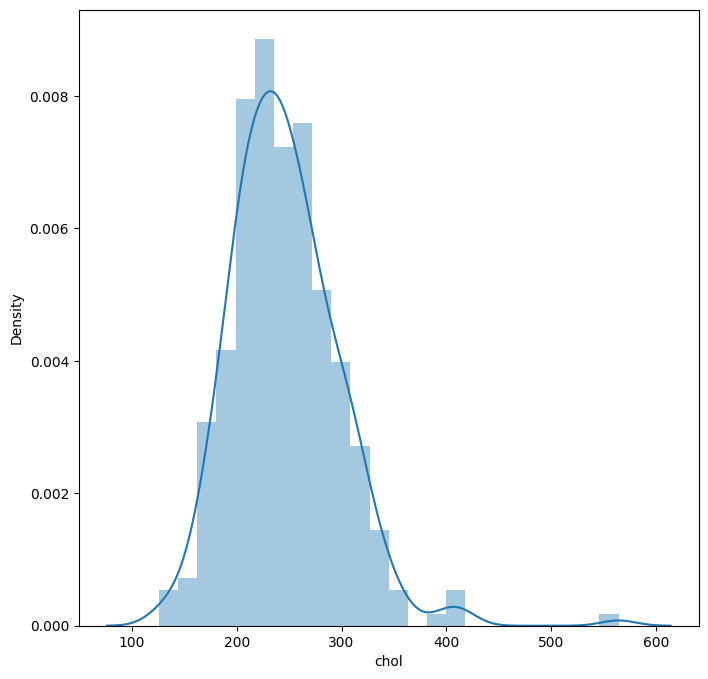

In [78]:
f,axes=plt.subplots(figsize=(8,8))
sns.distplot(heart_df.chol)


In [79]:
def find_outliers(col):
  from scipy import stats
  z=np.abs(stats.zscore(col))
  idx_outliers=np.where(z>3,True,False)
  return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(heart_df.chol)

idx

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [80]:
display(heart_df.loc[idx==True].describe().round(3))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4.000,4.0,4.000,4.000,4.000,4.00,4.0,4.000,4.00,4.000,4.00,4.000,4.00,4.000
mean,62.750,0.0,1.000,134.750,449.250,0.25,0.0,152.500,0.25,2.075,1.25,1.500,2.75,0.500
std,4.787,0.0,1.155,14.728,76.622,0.50,0.0,1.732,0.50,1.365,0.50,1.291,0.50,0.577
min,56.000,0.0,0.000,115.000,407.000,0.00,0.0,150.000,0.00,0.800,1.00,0.000,2.00,0.000
25%,61.250,0.0,0.000,129.250,408.500,0.00,0.0,152.250,0.00,1.400,1.00,0.750,2.75,0.000
50%,64.000,0.0,1.000,137.000,413.000,0.00,0.0,153.000,0.00,1.750,1.00,1.500,3.00,0.500
75%,65.500,0.0,2.000,142.500,453.750,0.25,0.0,153.250,0.25,2.425,1.25,2.250,3.00,1.000
max,67.000,0.0,2.000,150.000,564.000,1.00,0.0,154.000,1.00,4.000,2.00,3.000,3.00,1.000


In [81]:
display(heart_df.loc[idx==False].describe().round(3))
heart_df=heart_df.loc[idx==False]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,54.602,0.692,0.967,131.582,243.548,0.147,0.535,150.214,0.328,1.026,1.401,0.719,2.308,0.545
std,8.743,0.462,1.032,17.590,45.858,0.355,0.526,21.695,0.470,1.154,0.618,1.017,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,88.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,49.000,0.000,0.000,120.000,211.000,0.000,0.000,138.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,56.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.700,1.000,0.000,2.000,1.000
75%,60.000,1.000,2.000,140.000,273.500,0.000,1.000,165.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,394.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


<ipython-input-82-051f31b8fda1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.chol)


<Axes: xlabel='chol', ylabel='Density'>

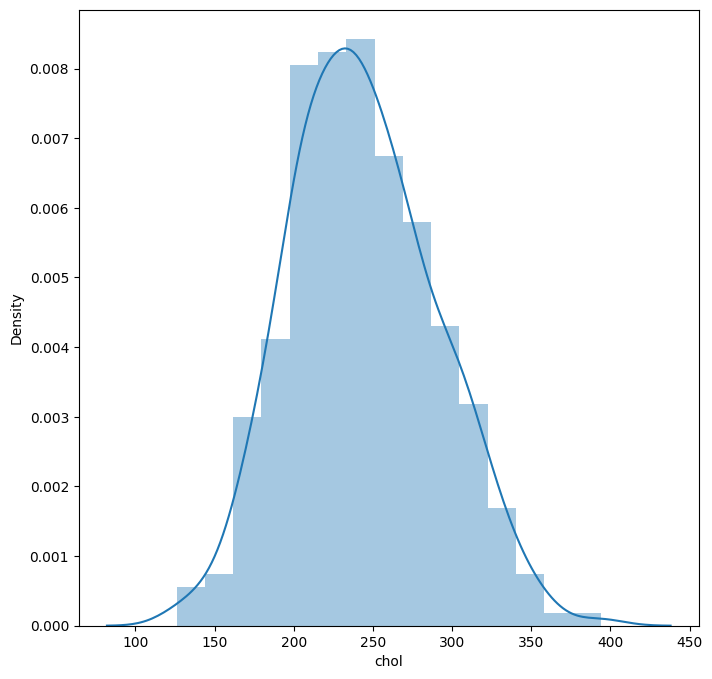

In [82]:
f,axes=plt.subplots(figsize=(8,8))
sns.distplot(heart_df.chol)

In [83]:
heart_df.corrwith(heart_df.target)

age        -0.224007
sex        -0.288805
cp          0.426488
trestbps   -0.140696
chol       -0.104369
fbs        -0.037664
restecg     0.137884
thalach     0.405654
exang      -0.435335
oldpeak    -0.427715
slope       0.343767
ca         -0.384939
thal       -0.342352
target      1.000000
dtype: float64

In [84]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.120055,-0.053149,0.264521,0.191458,0.128176,-0.082719,-0.338080,0.086527,0.195627,-0.169671,0.264302,0.054926,-0.224007
sex,-0.120055,1.000000,-0.049753,-0.054249,-0.139533,0.051924,-0.079645,-0.024527,0.141314,0.116748,-0.036135,0.136664,0.228916,-0.288805
cp,-0.053149,-0.049753,1.000000,0.053367,-0.101672,0.086751,0.045442,0.265942,-0.392098,-0.142571,0.115759,-0.171915,-0.158858,0.426488
trestbps,0.264521,-0.054249,0.053367,1.000000,0.142659,0.176550,-0.112884,-0.047277,0.068965,0.188864,-0.123414,0.091869,0.062779,-0.140696
chol,0.191458,-0.139533,-0.101672,0.142659,1.000000,0.004715,-0.112560,-0.043502,0.092797,0.013709,0.013755,0.052803,0.066402,-0.104369
fbs,0.128176,0.051924,0.086751,0.176550,0.004715,1.000000,-0.081747,-0.025900,0.031749,0.012834,-0.071281,0.142793,-0.023764,-0.037664
restecg,-0.082719,-0.079645,0.045442,-0.112884,-0.112560,-0.081747,1.000000,0.084065,-0.073863,-0.047656,0.090725,-0.063052,-0.002406,0.137884
thalach,-0.338080,-0.024527,0.265942,-0.047277,-0.043502,-0.025900,0.084065,1.000000,-0.369432,-0.361457,0.352446,-0.216063,-0.109574,0.405654
exang,0.086527,0.141314,-0.392098,0.068965,0.092797,0.031749,-0.073863,-0.369432,1.000000,0.296586,-0.257863,0.115981,0.208045,-0.435335
oldpeak,0.195627,0.116748,-0.142571,0.188864,0.013709,0.012834,-0.047656,-0.361457,0.296586,1.000000,-0.577924,0.207042,0.199552,-0.427715


<Axes: >

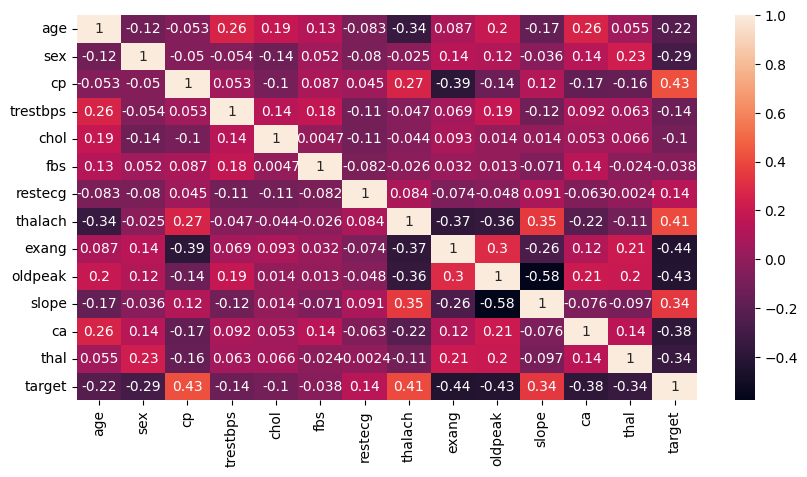

In [85]:
plt.figure(figsize = (10, 5))
sns.heatmap(heart_df.corr(), annot = True, annot_kws = {"size":10})

In [86]:
#statistical measure about the data
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.602007,0.692308,0.966555,131.581940,243.548495,0.147157,0.535117,150.214047,0.327759,1.025753,1.401338,0.719064,2.307692,0.545151
std,8.743481,0.462312,1.032469,17.589726,45.857602,0.354856,0.525782,21.694671,0.470183,1.154495,0.618071,1.017302,0.612214,0.498792
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,138.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,273.500000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
#checking the distribution of target variable
heart_df.target.value_counts()

1    163
0    136
Name: target, dtype: int64

1--->Defective Heart
0--->Healthy Heart

Splitting the features and target

In [88]:
X=heart_df.drop('target',axis=1)
Y=heart_df['target']

In [89]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0    1   3       145   233    1        0    150.0      0      2.3   
1    37.0    1   2       130   250    0        1    187.0      0      3.5   
2    41.0    0   1       130   204    0        0    172.0      0      1.4   
3    56.0    1   1       120   236    0        1    178.0      0      0.8   
4    57.0    0   0       120   354    0        1    163.0      1      0.6   
..    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298  57.0    0   0       140   241    0        1    153.0      1      0.2   
299  45.0    1   3       110   264    0        1    132.0      0      1.2   
300  68.0    1   0       144   193    1        1    141.0      0      3.4   
301  57.0    1   0       130   131    0        1    115.0      1      1.2   
302  57.0    0   1       130   236    0        0    174.0      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2     

In [90]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 299, dtype: int64


Splitting the data into training and test data

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [92]:
print(X.shape,X_train.shape,X_test.shape)

(299, 13) (239, 13) (60, 13)


Model Training

In [93]:

#Logistic Regression
clf=LogisticRegression()


In [94]:
#training model with training data
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation

In [95]:
#accuracy on training data
X_train_prediction=clf.predict(X_train)

In [96]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy on Training data ",training_data_accuracy)

Accuracy on Training data  0.8410041841004184


In [97]:
#accuracy on test data
X_test_prediction=clf.predict(X_test)
log_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy on Test data ",log_data_accuracy)
print(classification_report(Y_test,X_test_prediction))
print(confusion_matrix(Y_test,X_test_prediction))

Accuracy on Test data  0.85
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.86        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

[[23  4]
 [ 5 28]]


SVM

In [98]:
from sklearn import svm
classifier=svm.SVC(kernel="linear")
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [99]:
#accuracy score on the training data
svc_x_train_prediction=classifier.predict(X_train)
svc_training_data_accuracy=accuracy_score(svc_x_train_prediction,Y_train)

In [100]:
print(svc_training_data_accuracy)

0.8451882845188284


In [101]:
svc_x_test_prediction=classifier.predict(X_test)
svm_data_accuracy=accuracy_score(svc_x_test_prediction,Y_test)
print(svm_data_accuracy)

0.8166666666666667


In [102]:
print(classification_report(Y_test,svc_x_test_prediction))
print(confusion_matrix(Y_test,svc_x_test_prediction))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        33

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60

[[19  8]
 [ 3 30]]


Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier()


In [104]:
rclf.fit(X_train,Y_train)


RandomForestClassifier()

In [105]:
train_predictions=rclf.predict(X_train)
print(accuracy_score(Y_train,train_predictions))

1.0


In [106]:
test_predictions=rclf.predict(X_test)
random_data_accuracy=accuracy_score(Y_test,test_predictions)
print(random_data_accuracy)

0.85


In [107]:
print(classification_report(Y_test,test_predictions))
print(confusion_matrix(Y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.83      0.91      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.85        60
weighted avg       0.85      0.85      0.85        60

[[21  6]
 [ 3 30]]


Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [109]:
nb.fit(X_train,Y_train)

GaussianNB()

In [110]:
x_train_pred=nb.predict(X_train)
print(accuracy_score(Y_train,x_train_pred))

0.8326359832635983


In [111]:
x_test_pred=nb.predict(X_test)
bayes_data_accuracy=accuracy_score(Y_test,x_test_pred)
print(bayes_data_accuracy)

0.8166666666666667


In [112]:
print(classification_report(Y_test,x_test_pred))
print(confusion_matrix(Y_test,x_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.82      0.85      0.84        33

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

[[21  6]
 [ 5 28]]


KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5,metric="euclidean",n_jobs=-1)

In [114]:
kn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [115]:
xtrain_predict=kn.predict(X_train)
print(accuracy_score(Y_train,xtrain_predict))

0.7531380753138075


In [116]:
xtest_predict=kn.predict(X_test)
knn_data_accuracy=accuracy_score(Y_test,xtest_predict)
print(knn_data_accuracy)

0.7166666666666667


In [117]:
print(classification_report(Y_test,xtest_predict))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.71      0.82      0.76        33

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60



In [118]:
print(confusion_matrix(Y_test,xtest_predict))

[[16 11]
 [ 6 27]]


Comparing accuracies of 5 models

0.8166666666666667 0.85 0.8166666666666667 0.7166666666666667


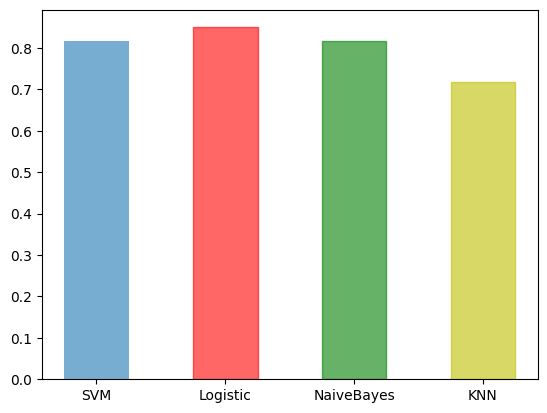

In [123]:

models=["SVM","Logistic","NaiveBayes","KNN"]
accuracies=[svm_data_accuracy,log_data_accuracy,bayes_data_accuracy,knn_data_accuracy]
barlist=plt.bar(models,accuracies,width=0.5,alpha=0.6)

barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('y')
print(svm_data_accuracy,log_data_accuracy,bayes_data_accuracy,knn_data_accuracy)


Building a predictive system

In [120]:
input_data=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
#change input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=clf.predict(input_data_reshaped)
print(prediction)
if prediction:
  print("Person has heart disease")
else:
  print("Person doesn't have heart disease")

[0]
Person doesn't have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [121]:
import pickle
filename='heart_model.sav'
pickle.dump(clf,open(filename,'wb'))